<a href="https://colab.research.google.com/github/yuqingg3/Housing-AI/blob/main/HousingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, r2_score

**CALIFORNIA HOUSING PRICING DATA FRAME**

In [ ]:
df = pd.read_csv(r'/content/sample_data/california_housing_test.csv')
x = df.drop(columns = ['median_house_value'])
y = df['median_house_value']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
import numpy as np
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


**CALIFORNIA HOUSING PRICING - LINEAR REGRESSION**

In [ ]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)
y_pred_LinearRegression=regresor.predict(x_test)
dfe = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred_LinearRegression]})
dfe
print("MSE (Linear Regression)", mean_squared_error(y_test,y_pred_LinearRegression))
print("RMSE (Linear Regression)", math.sqrt(mean_squared_error(y_test,y_pred_LinearRegression)))


MSE (Linear Regression) 5104315779.2288065
RMSE (Linear Regression) 71444.49439410154


**CALIFORNIA HOUSING PRICING - RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_random_forest = rf_regressor.predict(x_test)
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_random_forest))
print("RMSE (Random Forest)", math.sqrt(mean_squared_error(y_test,y_pred_random_forest)))


MSE (Random Forest): 3637856769.5895743
RMSE (Random Forest) 60314.64805160994


**CALIFORNIA HOUSING PRICING - DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred_decision_tree = dt_regressor.predict(x_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("MSE (Decision Tree):", mse_decision_tree)
rmse_decision_tree = math.sqrt(mse_decision_tree)
print("RMSE (Decision Tree):", rmse_decision_tree)

MSE (Decision Tree): 6665304019.045
RMSE (Decision Tree): 81641.31318790138


LINEAR REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)
y_pred_gradient_boosting = gb_regressor.predict(x_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
print("MSE (Gradient Boosting):", mse_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
print("RMSE (Gradient Boosting):", rmse_gradient_boosting)

MSE (Gradient Boosting): 3476499469.0848503
RMSE (Gradient Boosting): 58961.84757183962


Note: MSE and RMSE are too high, what can be done to reduce?

Gradient Boosting Regression

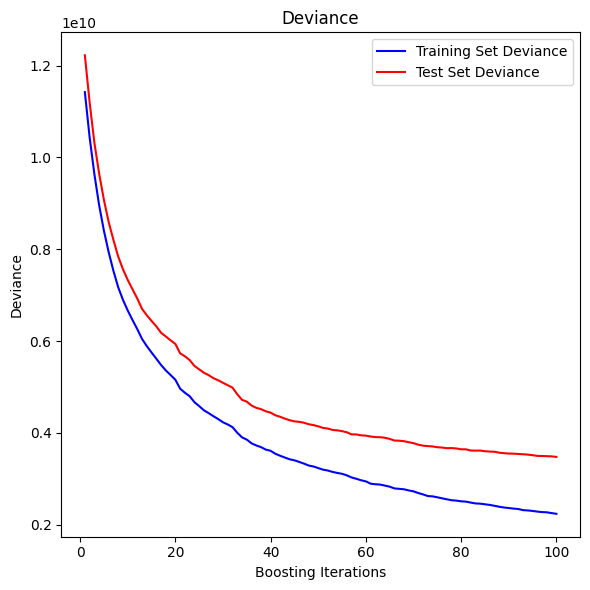

In [ ]:
test_score = np.zeros((gb_regressor.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gb_regressor.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(gb_regressor.n_estimators) + 1,
    gb_regressor.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(gb_regressor.n_estimators) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

**HOUSE SALES IN KING COUNTY, USA DATA FRAME**

In [ ]:
df = pd.read_csv(r'/content/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-274-e393fe68351b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
x = df.drop(columns = ['price','date','id'])
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



**HOUSE SALES LINEAR REGRESSION**

In [ ]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)
y_pred_LinearRegression=regresor.predict(x_test)
dfe = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred_LinearRegression]})
dfe
print("MSE (Linear Regression)", mean_squared_error(y_test,y_pred_LinearRegression))
print("RMSE (Linear Regression)", math.sqrt(mean_squared_error(y_test,y_pred_LinearRegression)))

errors = abs(y_pred_LinearRegression - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(y_test)
print('Accuracy:', round(accuracy, 2), '%.')


MSE (Linear Regression) 37529759778.41518
RMSE (Linear Regression) 193725.99148904922
Accuracy: -546208.07 %.


**HOUSE SALES - RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_random_forest = rf_regressor.predict(x_test)
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_random_forest))
print("RMSE (Random Forest)", math.sqrt(mean_squared_error(y_test,y_pred_random_forest)))


MSE (Random Forest): 55.95264798795179
RMSE (Random Forest) 7.480150265064987


**HOUSE SALES - DECISON TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred_decision_tree = dt_regressor.predict(x_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("MSE (Decision Tree):", mse_decision_tree)
rmse_decision_tree = math.sqrt(mse_decision_tree)
print("RMSE (Decision Tree):", rmse_decision_tree)


**NASHVILLE DATA FRAME**

In [ ]:
df = pd.read_csv(r'/content/Nashville_housing_data_2013_2016.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [ ]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-284-e393fe68351b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Unnamed: 0.1,Unnamed: 0,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
Unnamed: 0.1,1.000000,1.000000,0.017492,0.000492,0.008160,-0.055079,-0.080369,-0.081019,-0.041101,0.006988,-0.040619,-0.058718,-0.023959
Unnamed: 0,1.000000,1.000000,0.017492,0.000492,0.008160,-0.055079,-0.080369,-0.081019,-0.041101,0.006988,-0.040619,-0.058718,-0.023959
Sale Price,0.017492,0.017492,1.000000,0.201185,0.057126,0.603653,0.574624,0.661740,0.634628,0.037270,0.372739,0.512608,0.239271
Acreage,0.000492,0.000492,0.201185,1.000000,0.145742,0.295960,0.127144,0.210057,0.414040,0.018300,0.150476,0.171400,0.042220
Neighborhood,0.008160,0.008160,0.057126,0.145742,1.000000,0.199874,0.085731,0.140270,0.110563,0.122481,0.085963,0.121274,0.006291
Land Value,-0.055079,-0.055079,0.603653,0.295960,0.199874,1.000000,0.516312,0.765885,0.444283,-0.015442,0.342063,0.513316,0.180948
Building Value,-0.080369,-0.080369,0.574624,0.127144,0.085731,0.516312,1.000000,0.945604,0.801657,0.194901,0.447561,0.587768,0.347409
Total Value,-0.081019,-0.081019,0.661740,0.210057,0.140270,0.765885,0.945604,1.000000,0.765096,0.138075,0.452223,0.625595,0.324284
Finished Area,-0.041101,-0.041101,0.634628,0.414040,0.110563,0.444283,0.801657,0.765096,1.000000,0.141580,0.582739,0.476505,0.225578
Year Built,0.006988,0.006988,0.037270,0.018300,0.122481,-0.015442,0.194901,0.138075,0.141580,1.000000,0.164829,0.293611,0.263455


In [ ]:
x = df.drop(columns = ['Sale Price', 'Parcel ID','Land Use','Property Address','Suite/ Condo   #','Property City','Sale Date','Legal Reference','Sold As Vacant','Multiple Parcels Involved in Sale','Address','Owner Name','City','State','Tax District','image','Foundation Type','Exterior Wall','Grade'])
y = df['Sale Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


**NASHVILLE HOUSING - LINEAR REGRESSION**

In [ ]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)
y_pred_LinearRegression=regresor.predict(x_test)
dfe = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred_LinearRegression]})
dfe
print("MSE (Linear Regression)", mean_squared_error(y_test,y_pred_LinearRegression))
print("RMSE (Linear Regression)", math.sqrt(mean_squared_error(y_test,y_pred_LinearRegression)))



ValueError: ignored

**NASHVILLE HOUSING - RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_random_forest = rf_regressor.predict(x_test)
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_random_forest))
print("RMSE (Random Forest)", math.sqrt(mean_squared_error(y_test,y_pred_random_forest)))



MSE (Random Forest): 16756583376.240316
RMSE (Random Forest) 129447.22235814996


**NASHVILLE HOUSING - DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred_decision_tree = dt_regressor.predict(x_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("MSE (Decision Tree):", mse_decision_tree)
rmse_decision_tree = math.sqrt(mse_decision_tree)
print("RMSE (Decision Tree):", rmse_decision_tree)


**REAL ESTATE DATA FRAME**

In [ ]:
df = pd.read_csv(r'/content/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


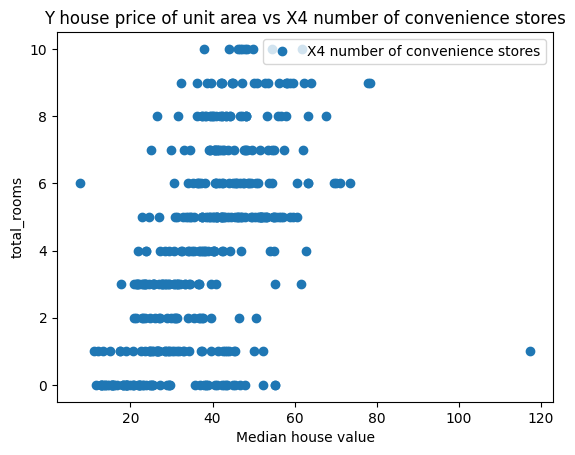

In [ ]:
df.plot(x='Y house price of unit area', y='X4 number of convenience stores', style = 'o')
plt.title("Y house price of unit area vs X4 number of convenience stores")
plt.xlabel("Median house value")
plt.ylabel("total_rooms")
plt.show()

In [ ]:
x = df.drop(columns = ['Y house price of unit area'])
y = df['Y house price of unit area']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


**REAL ESTATE - LINEAR REGRESSION**

In [ ]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)
y_pred_LinearRegression=regresor.predict(x_test)
dfe = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred_LinearRegression]})
dfe
print("MSE (Linear Regression)", mean_squared_error(y_test,y_pred_LinearRegression))
print("RMSE (Linear Regression)", math.sqrt(mean_squared_error(y_test,y_pred_LinearRegression)))



MSE (Linear Regression) 83.9021827072238
RMSE (Linear Regression) 9.159813464652203


**REAL ESTATE - RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_random_forest = rf_regressor.predict(x_test)
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_random_forest))
print("RMSE (Random Forest)", math.sqrt(mean_squared_error(y_test,y_pred_random_forest)))



MSE (Random Forest): 52.48022730120483
RMSE (Random Forest) 7.244323798754776


**REAL ESTATE - DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred_decision_tree = dt_regressor.predict(x_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("MSE (Decision Tree):", mse_decision_tree)
rmse_decision_tree = math.sqrt(mse_decision_tree)
print("RMSE (Decision Tree):", rmse_decision_tree)



MSE (Decision Tree): 104.9420481927711
RMSE (Decision Tree): 10.244122617031246
